# Infinite sum identities with sin

In [163]:
import sympy
from sympy import symbols
from sympy import plot
from sympy import Product, oo
from sympy.utilities.lambdify import lambdify

In [199]:
x, n, y, K, r = symbols('x n y K r')
pi = sympy.pi
I = sympy.I

In [167]:
eq1a = sympy.Eq(pi*sympy.sin(pi*x*y)/sympy.sin(pi*x), -sympy.Sum(sympy.sin(pi*n*(y+1))/(n + x), (n,-oo,oo)))
eq1b = sympy.Eq(sympy.sin(pi*x*y), -sympy.Sum((-1)**n *sympy.sin(pi*x)*sympy.sin(pi*y*n)/(pi*n + pi*x), (n,-oo,oo)))
rhs_eq1 = -sympy.Sum(sympy.sin(pi*(y+1)*n)/(n + x), (n,-K,K))
lhs_eq1 = pi*sympy.sin(pi*x*y) / sympy.sin(pi*x)

In [148]:
eq1a

Eq(pi*sin(pi*x*y)/sin(pi*x), -Sum(sin(pi*n*(y + 1))/(n + x), (n, -oo, oo)))

In [149]:
eq1b

Eq(sin(pi*x*y), -Sum((-1)**n*sin(pi*x)*sin(pi*n*y)/(pi*n + pi*x), (n, -oo, oo)))

In [134]:
rhs_eq1_num = lambdify([x, y, K], rhs_eq1)
lhs_eq1_num = lambdify([x, y], lhs_eq1)

In [161]:
_x = 0.256
_y = 0.87 + 2
_K = 1000000

lhs_eq1_num(_x, _y), rhs_eq1_num(_x, _y, _K)

(3.2284457054054907, 2.8087033343903562)

In [169]:
c1 = 

In [193]:
import numpy as np
import matplotlib.pyplot as plt
yarr = np.linspace(0, 20, 200)
f_rhs = sympy.lambdify([x, y, K], rhs_eq1)
f_lhs = sympy.lambdify([x, y], lhs_eq1)
flhs_arr = f_lhs(0.23, yarr)
frhs_arr = f_rhs(0.23, yarr, 1000)

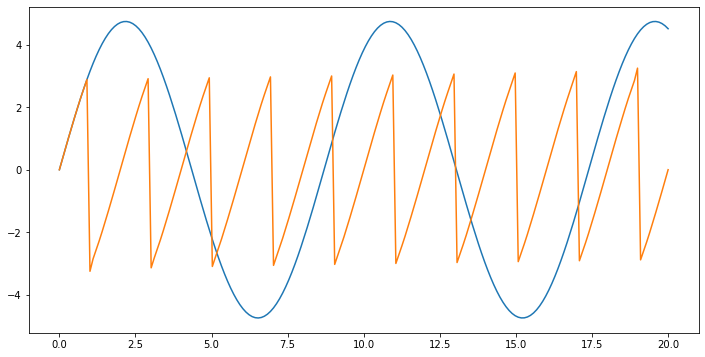

In [194]:
fig = plt.figure(figsize=(12,6))
plt.plot(yarr, flhs_arr)
plt.plot(yarr, frhs_arr)
plt.show()

In [172]:
p1 = plot(
    c1(2.34,y),
    xlim=(0, 6),
    size=(12, 6)
)

p1

TypeError: can't convert -oo to int

In [139]:
sympy.diff(lhs_eq1,x)

pi**2*y*cos(pi*x*y)/sin(pi*x) - pi**2*sin(pi*x*y)*cos(pi*x)/sin(pi*x)**2

In [140]:
sympy.diff(1/(n+x),x)

-1/(n + x)**2

In [143]:
sympy.integrate(lhs_eq1,y)

pi*Piecewise((-cos(pi*x*y)/(pi*x), Ne(pi*x, 0)), (0, True))/sin(pi*x)

In [200]:
sympy.exp(I * pi * r * x)

exp(I*pi*r*x)

In [215]:
sympy.expand(sympy.integrate(sympy.exp(- I * r * x)*sympy.exp(-I * n * x), (x, -pi, pi)) / (2 * pi))

Piecewise((I/(n*exp(I*pi*n)*exp(I*pi*r) + r*exp(I*pi*n)*exp(I*pi*r)) - I/(n*exp(-I*pi*n)*exp(-I*pi*r) + r*exp(-I*pi*n)*exp(-I*pi*r)), Ne(n, -r)), (2*pi, True))/(2*pi)

In [216]:
I*sympy.exp(I * pi * (n+r))/(n+r) - I*sympy.exp(-I * pi * (n+r))/(n+r)

I*exp(I*pi*(n + r))/(n + r) - I*exp(-I*pi*(n + r))/(n + r)

In [217]:
2 * sympy.sin(pi * (n+r)) / (n + r)

2*sin(pi*(n + r))/(n + r)

In [218]:
sympy.Eq(
    sympy.exp(I * pi * r * x), 
    sympy.Sum((I*sympy.exp(I * pi * (n+r))/(n+r) - I*sympy.exp(-I * pi * (n+r))/(n+r)) * sympy.exp(I * pi * n * x), (n,-oo,oo))
)

Eq(exp(I*pi*r*x), Sum((I*exp(I*pi*(n + r))/(n + r) - I*exp(-I*pi*(n + r))/(n + r))*exp(I*pi*n*x), (n, -oo, oo)))

In [225]:
I*sympy.exp(I * pi * r) * sympy.Sum(sympy.exp(I * pi * n * (x +1))/(n+r) , (n,-oo,oo)) - I*sympy.exp(-I * pi * r)* sympy.Sum(  sympy.exp(I * pi * n * (x-1))/(n+r), (n,-oo,oo))

I*exp(I*pi*r)*Sum(exp(I*pi*n*(x + 1))/(n + r), (n, -oo, oo)) - I*exp(-I*pi*r)*Sum(exp(I*pi*n*(x - 1))/(n + r), (n, -oo, oo))

In [226]:
from sympy import lerchphi

In [228]:
I*sympy.exp(I * pi * r) * lerchphi(sympy.exp(I * pi *  (x +1)),1,r) - I*sympy.exp(-I * pi * r) * lerchphi(sympy.exp(I * pi *  (x -1)),1,r)

-I*lerchphi(exp(I*pi*(x - 1)), 1, r)*exp(-I*pi*r) + I*lerchphi(exp(I*pi*(x + 1)), 1, r)*exp(I*pi*r)

In [229]:
lerch_eq = sympy.Eq(
    sympy.exp(I * pi * r * x),
    I*sympy.exp(I * pi * r) * lerchphi(sympy.exp(I * pi *  (x +1)),1,r) - I*sympy.exp(-I * pi * r) * lerchphi(sympy.exp(I * pi *  (x -1)),1,r)
)

In [230]:
lerch_eq

Eq(exp(I*pi*r*x), -I*lerchphi(exp(I*pi*(x - 1)), 1, r)*exp(-I*pi*r) + I*lerchphi(exp(I*pi*(x + 1)), 1, r)*exp(I*pi*r))

In [231]:
lerch_eq_num = sympy.lambdify([r,x], lerch_eq)

In [232]:
lerch_eq_num(0.2,0.3)

NameError: name 'lerchphi' is not defined